# Working With US Shape Data

With our data set, there are lots of interesting questions for us to look into for nation-wide data. In doing this, we will need to create lists and objects involving the names of the states. We also will want to plot data with basemap to compare values over time in different states. The 'crusaderutils' module will import our usual pandas(as pd), numpy(as np), and matplotlib.pyplot(as plt), as well as some pre-made variables and functions to assist in working with the TRI data.

As of now, 'crusaderutils' contains:
<h3>module imports:</h3>
pd, np, plt, basemap imports<br>

<h3>vars:</h3>
<b>statelist_abbrs</b>:  list of state abbreviations  (ex: 'AK', 'NC, 'NY', etc...)<br>
<b>statelist_names</b>:  list of state names (ex: 'Alaska', 'North Carolina', 'New York', etc...)<br>

<h3>functions:</h3>
<b>make_state_obj_abbrs(keys_list,vals_list)</b>: creates a dict with statelist_abbrs as keys,  vals_list as values<br>
<b>make_state_obj_names(keys_list,vals_list)</b>:  creates a dict with statelist_names as keys, vals_list as values<br>
<b>map_compare_states(state_obj,min,max,title)</b>:  creates basemap with given state_obj, min value in vals_list, max value in vals_list, and a string for the title<br>
    

## Testing crusaderutils vars and functions

In [1]:
%pylab inline
from crusaderutils import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
# using five-year range to test functions
us2012 = pd.read_csv('./clean_TRI_Data/US_TRI/TRI_2012_US_CLEAN.csv')
us2013 = pd.read_csv('./clean_TRI_Data/US_TRI/TRI_2013_US_CLEAN.csv')
us2014 = pd.read_csv('./clean_TRI_Data/US_TRI/TRI_2014_US_CLEAN.csv')
us2015 = pd.read_csv('./clean_TRI_Data/US_TRI/TRI_2015_US_CLEAN.csv')
us2016 = pd.read_csv('./clean_TRI_Data/US_TRI/TRI_2016_US_CLEAN.csv')
us12to16 = pd.concat([us2012,us2013,us2014,us2015,us2016],ignore_index=True)

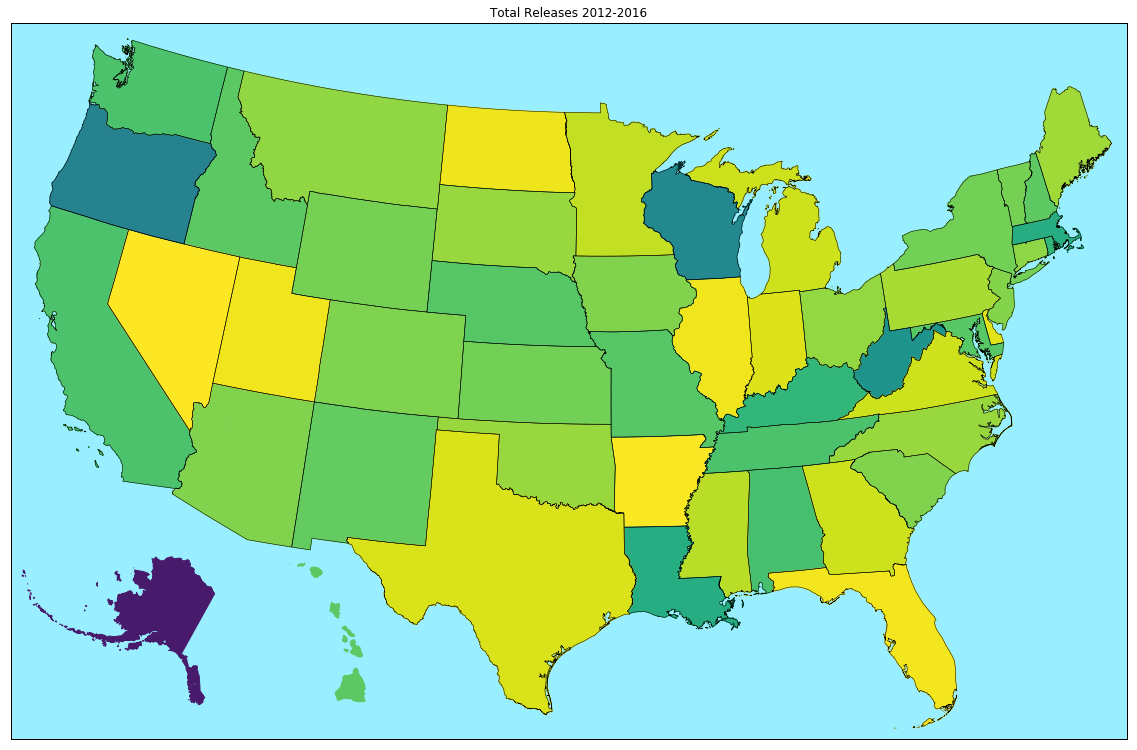

In [3]:
# total releases 2012-2016 by state, darker colors == more releases
total_releases = us12to16[['STATE','TOTAL_RELEASES']].groupby('STATE').sum()['TOTAL_RELEASES']
plt.figure(figsize=(20,20))
map_compare_states(make_state_obj_names(total_releases),total_releases.min(),total_releases.max(), 'Total Releases 2012-2016')


Above, we see that Alaska had the most pounds of TRI chemical emissions during the 2012-2016 timeframe.

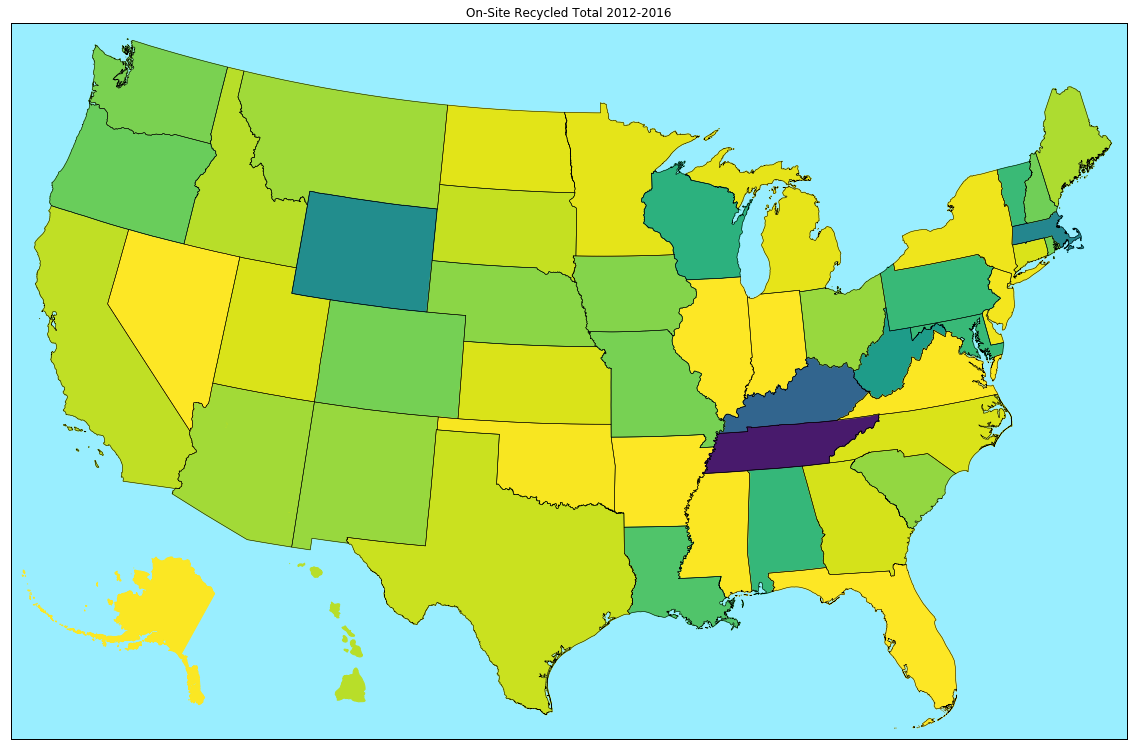

In [4]:
# on-site recycled 2012-2016 by state, darker colors == more releases
on_site_recycled_total = us12to16[['STATE','ON_SITE_RECYCLED_TOTAL']].groupby('STATE').sum()['ON_SITE_RECYCLED_TOTAL']
plt.figure(figsize=(20,20))
map_compare_states(make_state_obj_names(on_site_recycled_total),on_site_recycled_total.min(),on_site_recycled_total.max(), 'On-Site Recycled Total 2012-2016')


This map shows Tennessee having the largest amount of on-site recycling during the time period.

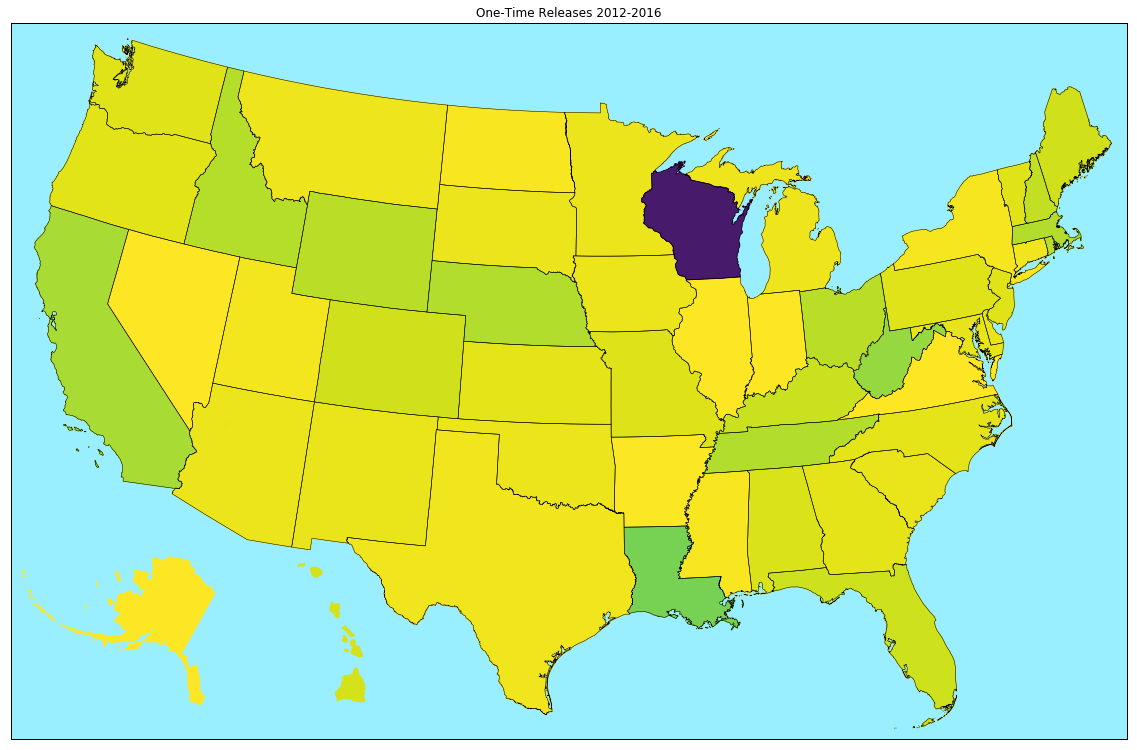

In [5]:
#one-time releases 2012-2016 by state, darker colors == more releases
one_time_releases = us12to16[['STATE','ONE_TIME_RELEASES']].groupby('STATE').sum()['ONE_TIME_RELEASES']
plt.figure(figsize=(20,20))
map_compare_states(make_state_obj_names(one_time_releases),one_time_releases.min(),one_time_releases.max(), 'One-Time Releases 2012-2016')

In this third map, we see that Wisconsin had the greatest amount of one-time releases during the time period. One-time releases are accidental or non-recurring releases that may indicate some accident at a facility or facilities. I'm interested to see what event/events gave Wisconsin such a lead in this category(not the one that you want to be first-place in!).

Everything works well for the basic case of visualizing the states, and differences in values given to the map_compare_states function. We can probably use this tool to visualize some interesting things!


## TODO:
To the mapping function, I'd like to add args to select color scheme for states ([color maps](https://matplotlib.org/users/colormaps.html)), should be easy, just need to do it.

Add legend to maps that indicates color values

Decide what other variables and functions would be interesting to have in the crusaderutils file.

